<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/fire_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

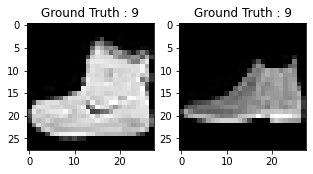

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [13]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [14]:
fashion_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [15]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 85s 112ms/step - loss: 0.6631 - accuracy: 0.7604 - val_loss: 0.3132 - val_accuracy: 0.8849
Epoch 2/20
750/750 [==============================] - 94s 125ms/step - loss: 0.2981 - accuracy: 0.8913 - val_loss: 0.2701 - val_accuracy: 0.9009
Epoch 3/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2422 - accuracy: 0.9116 - val_loss: 0.2520 - val_accuracy: 0.9093
Epoch 4/20
750/750 [==============================] - 85s 114ms/step - loss: 0.2077 - accuracy: 0.9235 - val_loss: 0.2436 - val_accuracy: 0.9137
Epoch 5/20
750/750 [==============================] - 83s 111ms/step - loss: 0.1752 - accuracy: 0.9355 - val_loss: 0.2398 - val_accuracy: 0.9167
Epoch 6/20
750/750 [==============================] - 85s 113ms/step - loss: 0.1591 - accuracy: 0.9404 - val_loss: 0.2351 - val_accuracy: 0.9172
Epoch 7/20
750/750 [==============================] - 86s 114ms/step - loss: 0.1351 - accuracy: 0.9504 - val_loss: 0.2257 - val_ac

In [16]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.46918413043022156
Test accuracy: 0.9204000234603882


In [20]:
print(fashion_train.history)

{'loss': [0.4547748565673828, 0.2844540476799011, 0.23810367286205292, 0.2038916051387787, 0.17931252717971802, 0.16100715100765228, 0.1381291151046753, 0.11635761708021164, 0.1005982756614685, 0.08531054109334946, 0.07099166512489319, 0.06604564189910889, 0.054166000336408615, 0.04638383910059929, 0.04314877465367317, 0.037794727832078934, 0.033473413437604904, 0.033317822962999344, 0.03104368783533573, 0.03222771733999252], 'accuracy': [0.8358749747276306, 0.8962500095367432, 0.9124374985694885, 0.924791693687439, 0.9333958625793457, 0.9401249885559082, 0.9487083554267883, 0.9556249976158142, 0.9628124833106995, 0.9678958058357239, 0.9735833406448364, 0.9755208492279053, 0.9796249866485596, 0.9828958511352539, 0.9841874837875366, 0.9861041903495789, 0.9878333210945129, 0.9876458048820496, 0.989062488079071, 0.9881458282470703], 'val_loss': [0.3132271468639374, 0.27005213499069214, 0.2519973814487457, 0.24360814690589905, 0.23976726830005646, 0.23506611585617065, 0.22571830451488495, 

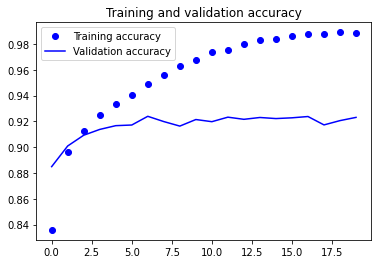

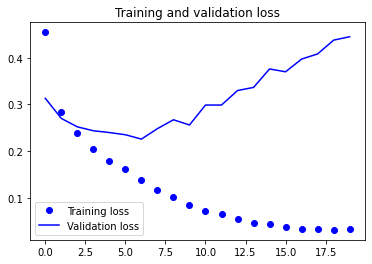

In [21]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
batch_size = 64
epochs = 5
num_classes = 10

In [23]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [24]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [25]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [26]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/5
750/750 [==============================] - 90s 119ms/step - loss: 0.8606 - accuracy: 0.6788 - val_loss: 0.3672 - val_accuracy: 0.8643
Epoch 2/5
750/750 [==============================] - 90s 120ms/step - loss: 0.3945 - accuracy: 0.8563 - val_loss: 0.3077 - val_accuracy: 0.8844
Epoch 3/5
750/750 [==============================] - 89s 119ms/step - loss: 0.3257 - accuracy: 0.8805 - val_loss: 0.2728 - val_accuracy: 0.8975
Epoch 4/5
750/750 [==============================] - 90s 120ms/step - loss: 0.2952 - accuracy: 0.8892 - val_loss: 0.2623 - val_accuracy: 0.9036
Epoch 5/5
750/750 [==============================] - 89s 119ms/step - loss: 0.2800 - accuracy: 0.8954 - val_loss: 0.2401 - val_accuracy: 0.9112


In [27]:
fashion_model.save("fashion_model_dropout.h5py")



INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [28]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


313/313 [==============================] - 6s 18ms/step - loss: 0.2554 - accuracy: 0.9060
Test loss: 0.25542140007019043
Test accuracy: 0.906000018119812


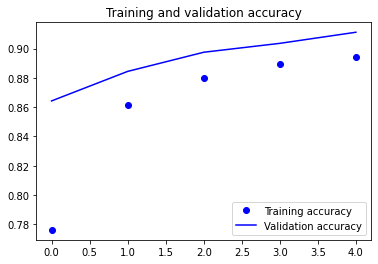

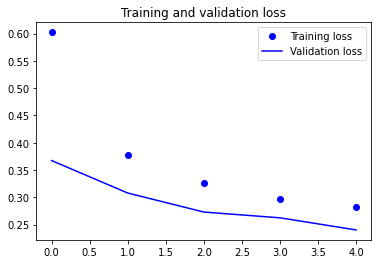

In [30]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes = fashion_model.predict(test_X)


In [32]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [33]:

predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 8976 correct labels


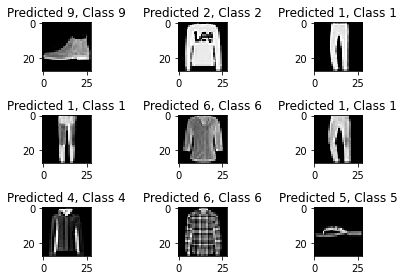

In [35]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1024 incorrect labels


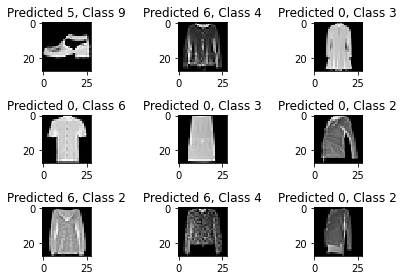

In [37]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [38]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.70      0.89      0.78      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.82      0.86      1000
     Class 3       0.94      0.86      0.90      1000
     Class 4       0.85      0.84      0.84      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.77      0.69      0.72      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

